# 0. Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle

# 1. Data preparation

## 1.1. Data overview 

In [2]:
# Load toy dataset: Diabetes
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)

In [3]:
diabetes_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [4]:
diabetes_y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [5]:
features_to_use = ["bmi"]  # We will try more than one features later.

In [6]:
# Convert to numpy arrays
diabetes_X = np.array(diabetes_X[features_to_use])
diabetes_y = np.array(diabetes_y)

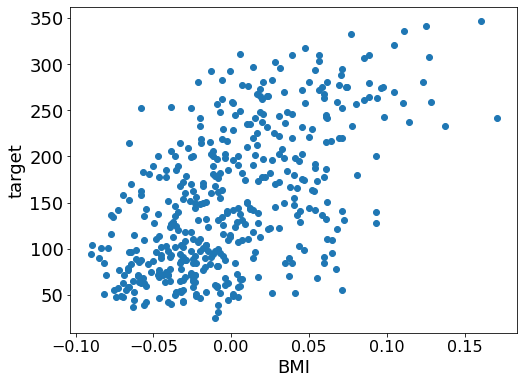

In [7]:
# Visualize data
plt.figure(figsize=(8,6))
plt.scatter(diabetes_X, diabetes_y)
plt.xlabel("BMI", fontsize=18)
plt.ylabel("target", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
plt.show()

## 1.2. Split the data into training and test set

In [8]:
# Shuffle the data first
diabetes_X, diabetes_y = shuffle(diabetes_X, diabetes_y, random_state=28)

In [9]:
# Training : Test = 4 : 1
num_train = int(len(diabetes_X) * 0.8)
diabetes_X_train = diabetes_X[:num_train]
diabetes_y_train = diabetes_y[:num_train]
diabetes_X_test = diabetes_X[num_train:]
diabetes_y_test = diabetes_y[num_train:]

In [10]:
# Reshape label vectors (required by sklearn)
diabetes_y_train = diabetes_y_train.reshape(-1, 1)
diabetes_y_test = diabetes_y_test.reshape(-1, 1)

# 2. Make prediction w/ a linear regression model

In [11]:
# Declare a linear regression model
lin_reg = linear_model.LinearRegression()

In [12]:
# Fit the model
lin_reg.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [13]:
# Make prediction on the test set
diabetes_y_pred = lin_reg.predict(diabetes_X_test)

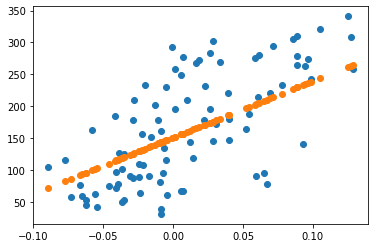

In [15]:
plt.figure()
plt.scatter(diabetes_X_test, diabetes_y_test)
plt.scatter(diabetes_X_test, diabetes_y_pred)
plt.show()

In [16]:
# Compute mean squared error - the smaller the better
mean_squared_error(diabetes_y_pred, diabetes_y_test)

4122.445010273345